## Regression Example

In [52]:
import sklearn as sk
import pandas as pd
import numpy as np

In [53]:
df=pd.read_csv("housing.data.txt", header=None, delimiter=r"\s+")
df_array=np.array(df)

In [54]:
#from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

lr = linear_model.LinearRegression()
ejemplos,variables=df.shape
df_array=np.random.permutation(df_array)
x=df_array[:,0:variables-1]
y=df_array[:,variables-1]


lr.fit(x,y)
predicted=lr.predict(x)

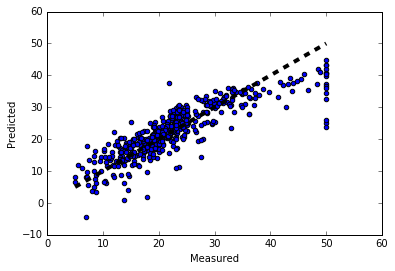

In [55]:
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Feature Selection

Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. Scikit-learn exposes feature selection routines as objects that implement the transform method:
- SelectKBest removes all but the k highest scoring features
- SelectPercentile removes all but a user-specified highest scoring percentage of features using common univariate statistical tests for each feature: false positive rate SelectFpr, false discovery rate
- SelectFdr, or family wise error SelectFwe.
- GenericUnivariateSelect allows to perform univariate feature selection with a configurable strategy. This allows to select the best univariate selection strategy with hyper-parameter search estimator.
For instance, we can perform a $\chi^2$ test to the samples to retrieve only the two best features as follows:

In [64]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import cross_val_score
from numpy.random import permutation
#f_regression
#Univariate linear regression tests.
#Quick linear model for testing the effect of a single regressor, sequentially for many regressors.
#This is done in 2 steps:
#The cross correlation between each regressor and the target is computed, that is, ((X[:, i] - mean(X[:, i])) * (y - mean_y)) / (std(X[:, i]) * std(y)).
#It is converted to an F score then to a p-value.

for i in range(1,variables):
    errores=[]
    for k in range(10):
        df_array=np.random.permutation(df_array)
        x=df_array[:,0:variables-1]
        y=df_array[:,variables-1]
        x_new = SelectKBest(f_regression, k=i).fit_transform(x, y)
        lr.fit(x_new,y)
        scores = cross_val_score(lr, x_new, y, cv=10,scoring='neg_mean_absolute_error')
        errores.append(-scores.mean())
    print 'Variables: ',i,'MSE: ',sum(errores)/len(errores)
    

Variables:  1 MSE:  4.52843426619
Variables:  2 MSE:  3.98596603268
Variables:  3 MSE:  3.68879230968
Variables:  4 MSE:  3.69106159119
Variables:  5 MSE:  3.6699325823
Variables:  6 MSE:  3.67490328175
Variables:  7 MSE:  3.66029177394
Variables:  8 MSE:  3.63745497449
Variables:  9 MSE:  3.64747029558
Variables:  10 MSE:  3.65469760892
Variables:  11 MSE:  3.56640801849
Variables:  12 MSE:  3.40481437227
Variables:  13 MSE:  3.40177229311


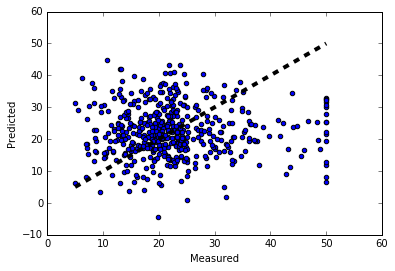

In [57]:
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Ridge Regression

In [65]:
from sklearn.linear_model import Ridge
experimentos=10
for i in range(1,variables):
    errores=[]
    for k in range(experimentos):
        df_array=np.random.permutation(df_array)
        x=df_array[:,0:variables-1]
        y=df_array[:,variables-1]
        x_new = SelectKBest(f_regression, k=i).fit_transform(x, y)
        ridgereg = Ridge(alpha=0.04,normalize=True)
        ridgereg.fit(x_new,y)
        scores = cross_val_score(ridgereg, x_new, y, cv=10,scoring='neg_mean_absolute_error')
        errores.append(-scores.mean())
    print 'Variables: ',i,'MSE: ',sum(errores)/len(errores)

Variables:  1 MSE:  4.5123615836
Variables:  2 MSE:  3.98995195171
Variables:  3 MSE:  3.67287730895
Variables:  4 MSE:  3.6811011194
Variables:  5 MSE:  3.66275529673
Variables:  6 MSE:  3.66967423859
Variables:  7 MSE:  3.64561505457
Variables:  8 MSE:  3.59867215809
Variables:  9 MSE:  3.6105429085
Variables:  10 MSE:  3.6230885593
Variables:  11 MSE:  3.53418275275
Variables:  12 MSE:  3.35712593338
Variables:  13 MSE:  3.35055101295


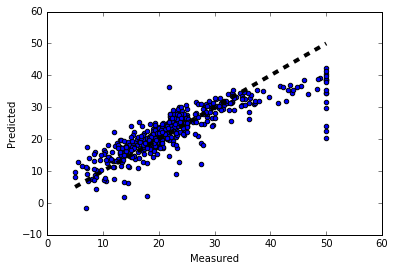

In [61]:
ridgereg = Ridge(alpha=0.2,normalize=True)
ridgereg.fit(x_new,y)
predicted=ridgereg.predict(x_new)
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Artificial Neural Networks

In [68]:
from sklearn.neural_network import MLPRegressor
from math import ceil

experimentos=10
for i in range(2,31):
    errores=[]
    for exp in range(experimentos):
        df_array=np.random.permutation(df_array)
        x=df_array[:,0:variables-1]
        y=df_array[:,variables-1]
        x_new = SelectKBest(f_regression, k=13).fit_transform(x, y)
        MLP = MLPRegressor(hidden_layer_sizes=(i,i,),solver="lbfgs",max_iter=300,activation="tanh",early_stopping=True)
        MLP.fit(x_new,y)
        scores = cross_val_score(MLP, x_new, y, cv=10,scoring='neg_mean_absolute_error')
        errores.append(-scores.mean())
    print 'Neuronas: ',i,'MSE: ',sum(errores)/len(errores)

Neuronas:  2 MSE:  6.52587375463
Neuronas:  3 MSE:  6.5936843046
Neuronas:  4 MSE:  6.41959869854
Neuronas:  5 MSE:  6.42351775244
Neuronas:  6 MSE:  6.40432383519
Neuronas:  7 MSE:  6.32123268125
Neuronas:  8 MSE:  6.23710014457
Neuronas:  9 MSE:  6.09039600836
Neuronas:  10 MSE:  6.05143536731
Neuronas:  11 MSE:  6.05798305551
Neuronas:  12 MSE:  5.76058991877
Neuronas:  13 MSE:  5.67250480685
Neuronas:  14 MSE:  5.65820097859
Neuronas:  15 MSE:  5.68869321904
Neuronas:  16 MSE:  5.53652744372
Neuronas:  17 MSE:  5.47127874759
Neuronas:  18 MSE:  5.33343430184
Neuronas:  19 MSE:  5.2457048798
Neuronas:  20 MSE:  5.22066270549
Neuronas:  21 MSE:  5.23425167001
Neuronas:  22 MSE:  5.14204052198
Neuronas:  23 MSE:  5.03465354349
Neuronas:  24 MSE:  5.20827916851
Neuronas:  25 MSE:  5.12598310326
Neuronas:  26 MSE:  4.96044493037
Neuronas:  27 MSE:  4.99516366919
Neuronas:  28 MSE:  5.1677162229
Neuronas:  29 MSE:  4.76737476758
Neuronas:  30 MSE:  4.73661086478
